In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import scipy as scipy
from scipy import stats
import matplotlib.path as mpath

# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

Client Scheduler: tcp://127.0.0.1:46063 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


### Load ESM4 datasets

In [2]:
### Load datasets
ds_static_seaice = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ice.static.nc')
ds_static_ocean = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.static.nc')

#### piControl sea ice extent
ds_sithick_control = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ice.010101-027012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])

### fafantwater sea ice extent ensemble members
ds_sithick_fafantwater_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_101/ice.010101-017512.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sithick_fafantwater_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_151/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sithick_fafantwater_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwater_201/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])

### fafstress sea ice extent ensemble members
ds_sithick_fafstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_101/ice.010101-017012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sithick_fafstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_151/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sithick_fafstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafstress_201/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])

### fafantwaterstress sea ice extent ensemble members
ds_sithick_fafantwaterstress_101 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_101/ice.010101-017012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sithick_fafantwaterstress_151 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_151/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sithick_fafantwaterstress_201 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/fafantwaterstress_201/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])

### Compute Ensemble Mean Sea Ice Thickness for Years 51 to 70 and Thickness Anomalies relative to piControl

In [3]:
sit_control_mean = ds_sithick_control['sithick'].sel(time=slice('0121-01-16','0220-01-16')).mean(dim='time')

#### FAFSTRESS
sit_fafstress_101_mean = ds_sithick_fafstress_101['sithick'].sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
sit_fafstress_151_mean = ds_sithick_fafstress_151['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafstress_201_mean = ds_sithick_fafstress_201['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')

### Ensemble mean fafstress
fafstress_ensemble = xr.concat([sit_fafstress_101_mean,sit_fafstress_151_mean,sit_fafstress_201_mean],dim='member')
fafstress_ensemble_mean = fafstress_ensemble.mean(dim='member')
fafstress_ensemble_mean

#### FAFANTWATERSTRESS
sit_fafantwaterstress_101_mean = ds_sithick_fafantwaterstress_101['sithick'].sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
sit_fafantwaterstress_151_mean = ds_sithick_fafantwaterstress_151['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafantwaterstress_201_mean = ds_sithick_fafantwaterstress_201['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')

fafantwaterstress_ensemble = xr.concat([sit_fafantwaterstress_101_mean,sit_fafantwaterstress_151_mean,sit_fafantwaterstress_201_mean],dim='member')
fafantwaterstress_ensemble_mean = fafantwaterstress_ensemble.mean(dim='member')
fafantwaterstress_ensemble_mean


#### FAFANTWATER
sit_fafantwater_101_mean = ds_sithick_fafantwater_101['sithick'].sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
sit_fafantwater_151_mean = ds_sithick_fafantwater_151['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafantwater_201_mean = ds_sithick_fafantwater_201['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')

fafantwater_ensemble = xr.concat([sit_fafantwater_101_mean,sit_fafantwater_151_mean,sit_fafantwater_201_mean],dim='member')
fafantwater_ensemble_mean = fafantwater_ensemble.mean(dim='member')
fafantwater_ensemble_mean

#### COMPUTE DIFFERENCES RELATIVE TO 100-yr of PICONTROL SEA ICE THICKNESS
difference_fafstress_ens = fafstress_ensemble_mean - sit_control_mean
difference_fafantwater_ens = fafantwater_ensemble_mean - sit_control_mean
difference_fafantwaterstress_ens = fafantwaterstress_ensemble_mean - sit_control_mean

difference_fafstress_101 = sit_fafstress_101_mean - sit_control_mean
difference_fafantwater_101 = sit_fafantwater_101_mean - sit_control_mean
difference_fafantwaterstress_101 = sit_fafantwaterstress_101_mean - sit_control_mean

difference_fafstress_151 = sit_fafstress_151_mean - sit_control_mean
difference_fafantwater_151 = sit_fafantwater_151_mean - sit_control_mean
difference_fafantwaterstress_151 = sit_fafantwaterstress_151_mean - sit_control_mean

difference_fafstress_201 = sit_fafstress_201_mean - sit_control_mean
difference_fafantwater_201 = sit_fafantwater_201_mean - sit_control_mean
difference_fafantwaterstress_201 = sit_fafantwaterstress_201_mean - sit_control_mean


### Function to set up Antarctic Polar Projection

In [4]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

depth = ds_static_ocean['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

import matplotlib.ticker as mticker

def antarctic_map(ax, grid):
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())
    ax.contour(ds_static_ocean.xh,ds_static_ocean.yh,shelf_mask,colors='black',linewidths = 0.5,transform=ccrs.PlateCarree())
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
        gl.ylocator = mticker.FixedLocator([-90, -80, -70, -60, -50])

In [5]:
x_seaice = ds_sithick_control.xT
x_seaice

<xarray.DataArray 'xT' (xT: 720)>
array([-299.75, -299.25, -298.75, ...,   58.75,   59.25,   59.75])
Coordinates:
  * xT       (xT) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
Attributes:
    long_name:  T point nominal longitude
    units:      degrees_E
    axis:       X
    edges:      xTe

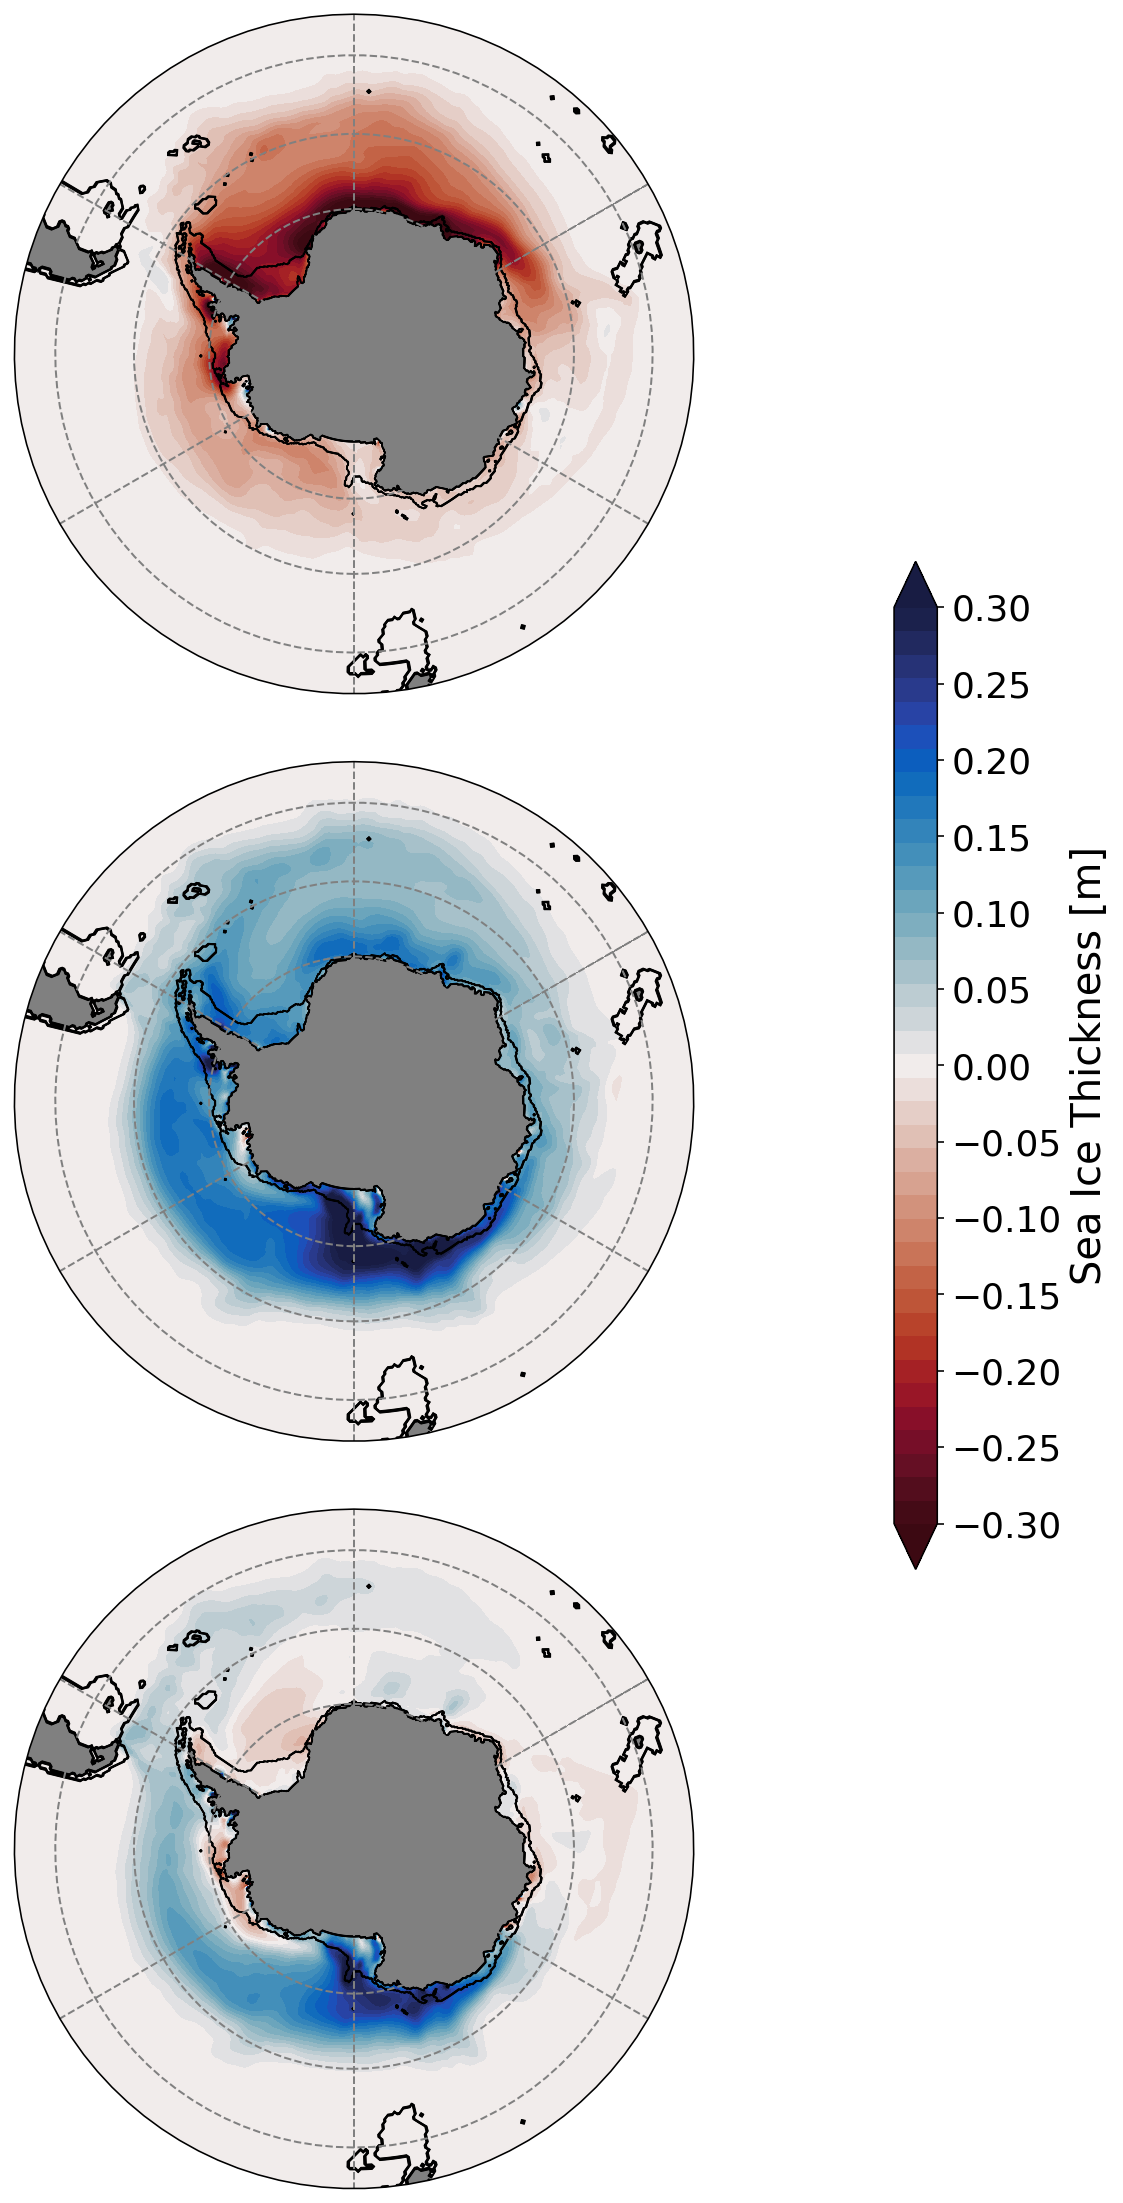

In [6]:
## Plot SSS global and polar projections
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),
    

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_seaice = ds_sithick_control.xT.values
y_seaice = ds_sithick_control.yT.values
xT,yT = np.meshgrid(x_seaice,y_seaice)

levels_seaice_diff = np.linspace(-0.3,0.3,40)

ax0.contourf(xT,yT,difference_fafstress_ens.values,
             levels=levels_seaice_diff,
             cmap=cmocean.cm.balance_r,
             transform=ccrs.PlateCarree(),extend='both')

ax1.contourf(xT,yT,difference_fafantwater_ens.values,
             levels=levels_seaice_diff,
             cmap=cmocean.cm.balance_r,
             transform=ccrs.PlateCarree(),extend='both')

ax2.contourf(xT,yT,difference_fafantwaterstress_ens.values,
             levels=levels_seaice_diff,
             cmap=cmocean.cm.balance_r,
             transform=ccrs.PlateCarree(),extend='both')

### Add Vertical Colorbar on Right
cbr_sit_diff = ax0.contourf(xT,yT,difference_fafstress_ens.values,
                            levels=levels_seaice_diff,
                            cmap=cmocean.cm.balance_r,
                            transform=ccrs.PlateCarree(),
                            extend='both')
cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_sit_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [-0.30,-0.25,-0.20,-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25,0.30])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Sea Ice Thickness [m]', fontsize=20)

plt.savefig('ESM4_Ensemble_Mean_SeaIce_Thickness_Anomalies.pdf')